**M505 Intro to AI and Machine Learning**

Name: Dhruv Dharwal

Student id: GH1035710

Dataset link: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification/data

**Business Problem Understanding**

The objective of the proposed work is to predict the price range of mobile phones through various features. This will help the companies in determining the market trend regarding the price range of mobiles and assist in informed business decisions.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

**Data Collection**

Here, I load the trainning dataset which is provided by the company.

In [2]:
df = pd.read_csv('/content/train.csv')
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=30)
df_train.shape, df_test.shape

((1600, 21), (400, 21))

In this, I split data into train and test set.


**Data Exploration**

In [4]:
df_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,...,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,1243.261250,0.485000,1.515188,0.514375,4.316250,0.526250,31.696250,0.499125,140.785625,4.533750,...,640.148125,1240.510000,2114.480625,12.381250,5.815000,10.994375,0.768750,0.509375,0.516875,1.486875
std,437.906478,0.499931,0.809651,0.499950,4.385859,0.499467,18.025872,0.288446,35.190676,2.296118,...,438.655704,432.022839,1080.862342,4.184267,4.362788,5.482187,0.421764,0.500068,0.499871,1.109886
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,860.000000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,110.000000,3.000000,...,282.000000,865.750000,1202.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,1240.500000,0.000000,1.500000,1.000000,3.000000,1.000000,31.000000,0.500000,142.000000,4.500000,...,570.000000,1238.500000,2127.500000,13.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.000000
75%,1617.000000,1.000000,2.200000,1.000000,7.000000,1.000000,47.000000,0.700000,170.250000,7.000000,...,928.500000,1618.250000,3031.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.000000
max,1998.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1878.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


From this, a lot of information about the range of values held by various features, such as battery power and screen resolution. Furthermore, variables such as 'px_height' implied the possible presence of skewness, thus helping our preprocessing decisions for better model performance.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1572 to 1829
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1600 non-null   int64  
 1   blue           1600 non-null   int64  
 2   clock_speed    1600 non-null   float64
 3   dual_sim       1600 non-null   int64  
 4   fc             1600 non-null   int64  
 5   four_g         1600 non-null   int64  
 6   int_memory     1600 non-null   int64  
 7   m_dep          1600 non-null   float64
 8   mobile_wt      1600 non-null   int64  
 9   n_cores        1600 non-null   int64  
 10  pc             1600 non-null   int64  
 11  px_height      1600 non-null   int64  
 12  px_width       1600 non-null   int64  
 13  ram            1600 non-null   int64  
 14  sc_h           1600 non-null   int64  
 15  sc_w           1600 non-null   int64  
 16  talk_time      1600 non-null   int64  
 17  three_g        1600 non-null   int64  
 18  touch_scre

From this, I got to know the datatypes of each feature and there is no null values available in my dataset.

**Data Preprocessing**

In my dataset there is no null and categorical values, so that's why I skipped this part.

**Feature Engineering**

In [6]:
x_train = df_train.drop('price_range', axis=1)
y_train = df_train['price_range']
x_test = df_test.drop('price_range', axis=1)
y_test = df_test['price_range']

Splitting data into training and testing sets.

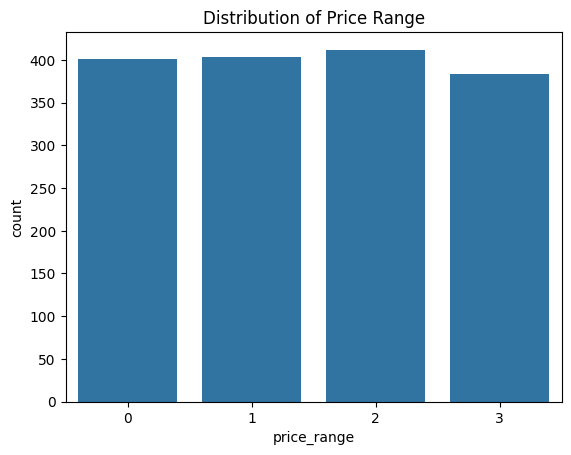

In [7]:
sns.countplot(x='price_range', data=df_train)
plt.title('Distribution of Price Range')
plt.show()

From this vertical bar graph, I got to know the distribution of the target variable 'price_range'. It helps to understand the class balance and frequency of each price range.

**Model Training**

This section includes traning different machine learning models like Logistic Regression, Random Forest, Decision Tree and Support Vector Classifier using training dataset.

In [ ]:
"""log_reg = LogisticRegression(max_iter= 14000)
log_reg.fit(x_train, y_train)

y_predict = log_reg.predict(x_test)
accuracy_score(y_test, y_predict)"""

With the Logistic Regression, I got the minimum accuracy in all models which was 78%. I got this accuracy after keep increasing max_iter and this is the maximum accuracy I got.

In [ ]:
"""ran_for = RandomForestClassifier()
ran_for.fit(x_train, y_train)

y_predict = ran_for.predict(x_test)
accuracy_score(y_test, y_predict)"""

With Random Forest I got the 86% accuracy.

In [ ]:
"""dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train, y_train)

y_predict = dec_tree.predict(x_test)
accuracy_score(y_test, y_predict)"""

With Decision Tree I got the 80% accuracy.

In [11]:
 svc = SVC()
 svc.fit(x_train, y_train)

 y_predict = svc.predict(x_test)
 accuracy_score(y_test, y_predict)

0.95

With Support Vector Classifier, I got the highest accuracy in all models which was 95%.

In [12]:
parameter_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=parameter_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

best_parameters = grid_search.best_params_
best_parameters

{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}

In this, I am performing hyperparameter tuning for a Support Vetor Classifier using GridSerachCV to get the best combination of hyperparameters that maximize the model's accuracy.

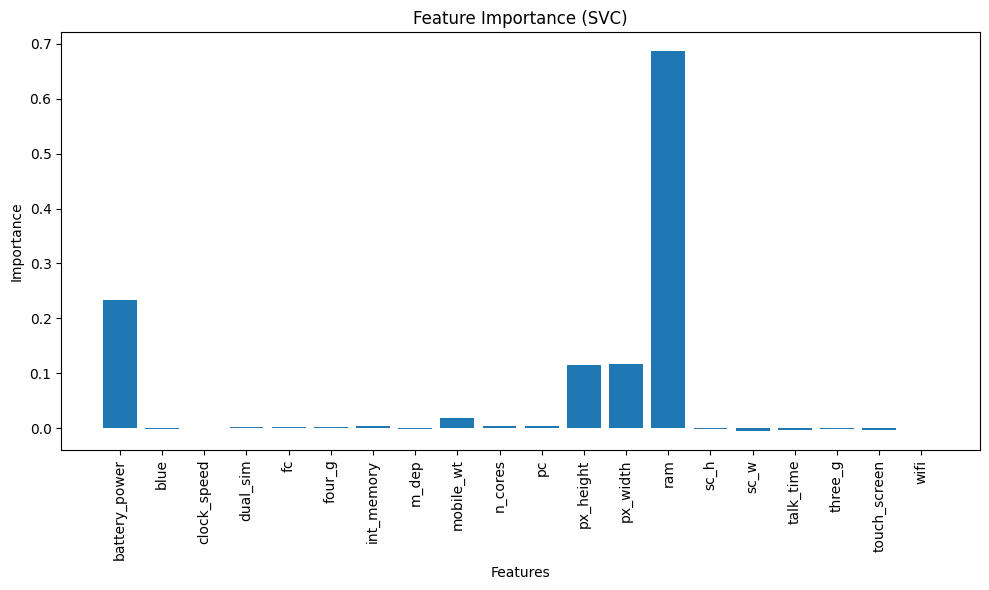

In [13]:
svc_2 = SVC(C=1, gamma='scale', kernel='linear')
svc_2.fit(x_train, y_train)
result = permutation_importance(svc_2, x_test, y_test, n_repeats=10, random_state=42)
imp = result.importances_mean

plt.figure(figsize=(10, 6))
plt.bar(x_train.columns, imp)
plt.xticks(rotation=90)
plt.title('Feature Importance (SVC)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

From this bar plot, shows the feature importance scores obtained from permutation_importance. It provides insight to prediction power of feature, key drivers of price range and feature selection.

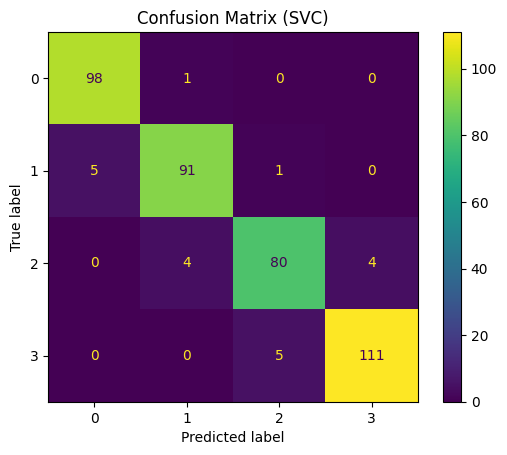

In [15]:
con_mat = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=svc_2.classes_)
disp.plot()
plt.title('Confusion Matrix (SVC)')
plt.show()

This confusion matrix shows the performance of Support Vector Classification. Further, indentifies the most dominant features in predicting price range.

In [16]:
svc_2 = SVC(C=1, gamma='scale', kernel='linear')
svc_2.fit(x_train, y_train)

y_predict = svc_2.predict(x_test)
accuracy_score(y_test, y_predict)


0.97

After hyperparametteric tunning, I got the accuracy of 97%.

In [17]:
test_set = pd.read_csv('/content/test.csv')
test_set

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,...,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,...,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,...,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,...,12,38,832,2509,15,11,6,0,1,0


Here, I load the test dataset which is provided by the company.

In [18]:
test_set.drop('id', axis=1, inplace=True)

Don't required the 'id' column. That's why I dropped it.

In [19]:
y_predict2 = svc_2.predict(test_set)
y_predict2

array([3, 3, 2, 3, 1, 3, 3, 1, 3, 0, 3, 3, 0, 0, 2, 0, 2, 1, 3, 2, 1, 3,
       1, 1, 3, 0, 2, 0, 3, 0, 2, 0, 3, 0, 0, 1, 3, 1, 2, 1, 1, 2, 0, 0,
       0, 1, 0, 3, 1, 2, 1, 0, 2, 0, 3, 1, 3, 1, 1, 3, 3, 3, 0, 1, 1, 1,
       2, 3, 1, 2, 1, 2, 2, 3, 3, 0, 2, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 0, 0, 3, 0, 2, 0, 1, 2, 3,
       3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 0, 3, 2, 1, 2, 0, 3, 2, 2, 2, 0, 2,
       2, 1, 3, 1, 1, 0, 3, 2, 1, 2, 1, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 0,
       3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 1, 0, 3, 0, 0, 0, 2, 1, 0, 1,
       0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 0, 3, 1, 0, 2, 2,
       3, 3, 1, 1, 3, 3, 3, 2, 2, 1, 1, 0, 1, 3, 0, 2, 3, 3, 0, 2, 0, 3,
       2, 3, 3, 1, 0, 1, 0, 3, 0, 1, 0, 2, 2, 1, 3, 1, 3, 0, 3, 1, 2, 0,
       0, 2, 1, 3, 3, 3, 1, 1, 3, 0, 0, 2, 3, 3, 1, 3, 1, 1, 3, 2, 1, 2,
       3, 3, 3, 1, 0, 1, 2, 3, 1, 1, 3, 2, 1, 3, 0, 1, 2, 1, 0, 3, 2, 3,
       3, 2, 1, 3, 3, 2, 3, 1, 2, 1, 2, 0, 2, 3, 1,

I got these price range vlaues for my test dataset.

**Conclusion**

In this project, an attempt was made to model the price range of mobile phones with respect to almost all the available features. Several supervised machine learning prediction approaches, including Logistic Regression, Random Forest, Decision Tree, and Support Vector Classifier (SVC), were employed and evaluated. By the end of the evaluation process, the SVC model had proven itself to be the best accurate model, with an outstanding accuracy level of 97% after hyperparameter tuning using GridSearchCV. This leaves no doubts about the ability of the SVC model, set with optimized parameters, to model any relationship between the input features of mobile phones and their price ranges.

The project justifies the use of machine learning to aid business decisions concerning market understanding and mobile phone pricing strategies. It can provide predictions from the model, SVC, for such important factors for price ranges, which are useful for product optimization and possible target types of markets.